RAW CML downloaded 2022 April 13 from : https://www.universiteitleiden.nl/en/research/research-output/science/cml-ia-characterisation-factors 
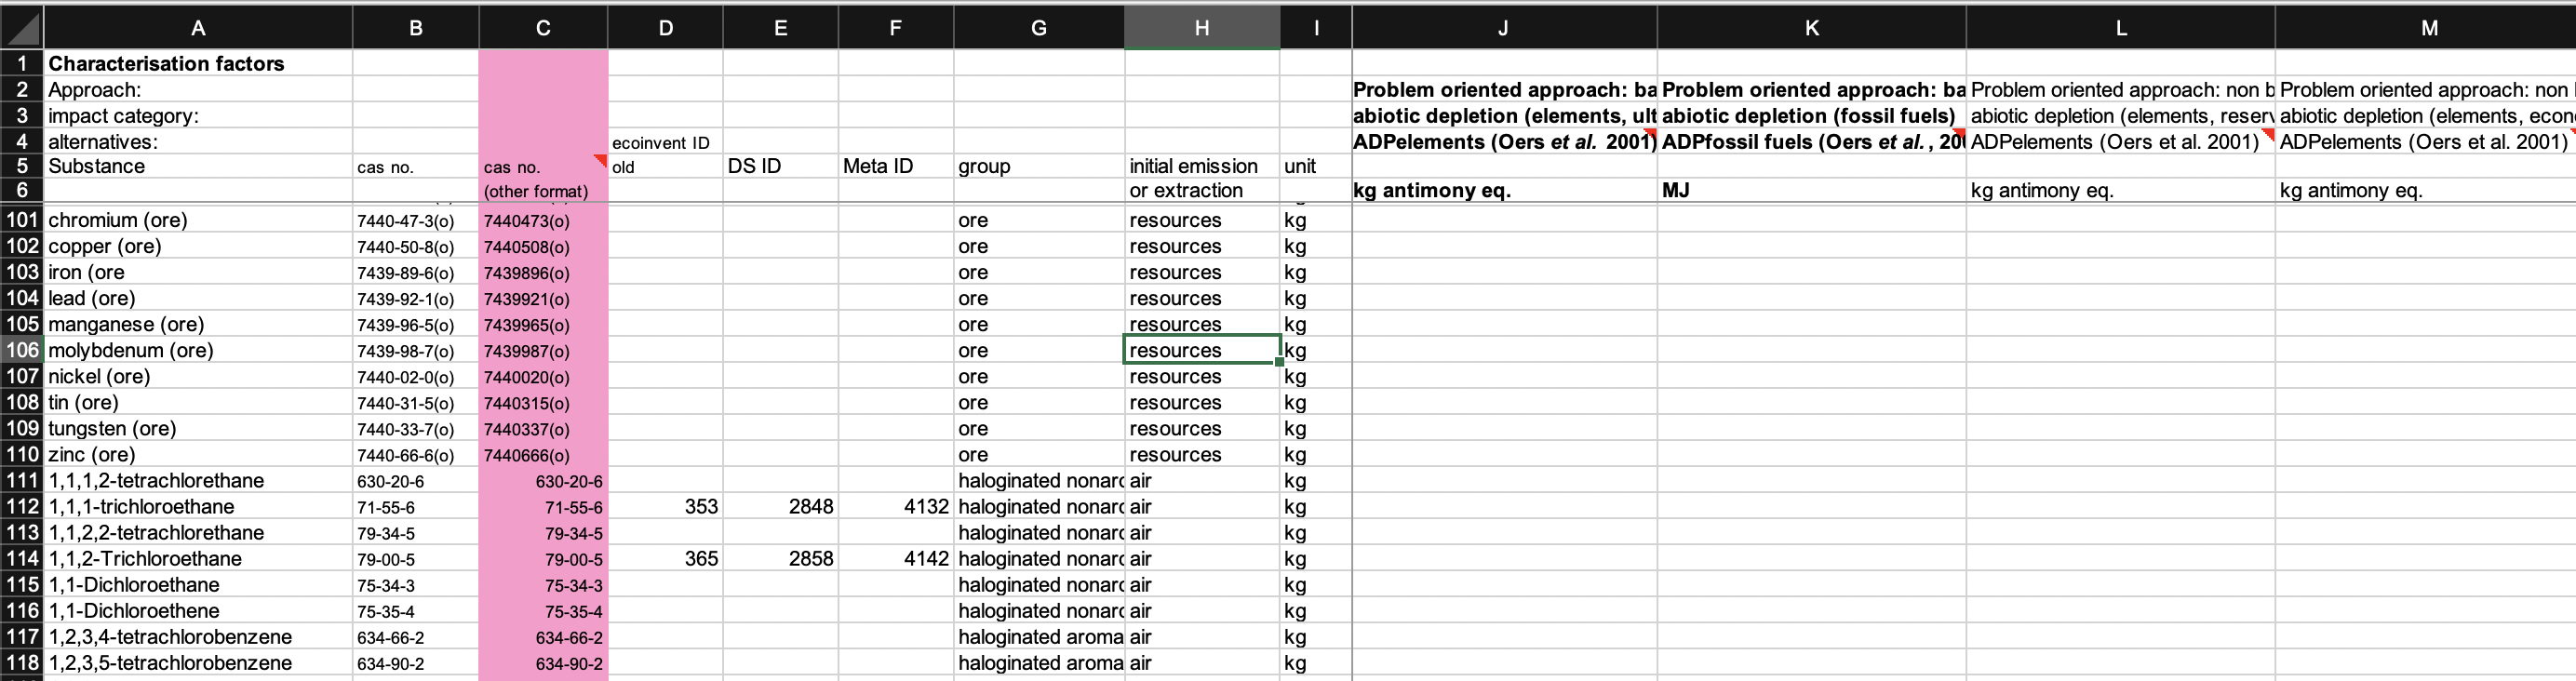

only use sheetname  "characterisation factors" for pairwise comp on CF values

In [1]:
import pickle
import pandas as pd
import os           
import numpy as np
import re
import itertools
import plotly.express as px
#import brightway2 as bw 
import random 
import string

In [2]:
cml = pd.read_excel("../../Data_rawCFs/cmlia/CML-IA-aug_2016_CFsheet.xlsx" )  #header=[1,2,3]

<h4> Among the original 111 columns, keep the first 8 cols, incl. substance name, CAS, emission compartment etc. </h4>

In [3]:
# keep first 8 cols,  substance / category info. 
cml_keep = cml.iloc[: , :9]

In [4]:
# rename columns,  
# cml_keep.columns = cml_keep.iloc[2]  #it has two same name "cas no."
cml_keep.columns = ["Substance", "cas_keep", "cas no.", "old",  "DS ID", "Meta ID", "group", "initial emission",  "unit"]
cml_keep.head()

,Substance,cas_keep,cas no.,old,DS ID,Meta ID,group,initial emission,unit
0,impact category:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alternatives:,NaN,NaN,ecoinvent ID,NaN,NaN,NaN,NaN,NaN
2,Substance,cas no.,cas no.,old,DS ID,Meta ID,group,initial emission,unit
3,NaN,NaN,(other format),NaN,NaN,NaN,NaN,or extraction,NaN
4,actinium (Ac),7440-34-8,7440348,NaN,NaN,NaN,element,resources,kg


<h4> Among the original 111 columns, only extract 11 baseline impact category cols. </h4>

In [5]:
cml_11IA_baseline = cml.filter(regex='Problem oriented approach: baseline')

In [6]:
IC_col_name = ["ADPelement_kgSb", "ADPfossil_MJ", "GWP_kgCO2", "ODP_kgCFC-11", "HTP_kg1,4DCB", "FAETP_kg1,4DCB", 
               "MAETP_kg1,4DCB", "TETP_kg1,4DCB", "POFP_kgEthylene" , "AP_kgSO2", "EP_kgPO4"]

In [7]:
#cml_11IA_baseline.columns = cml_11IA_baseline.iloc[0]
cml_11IA_baseline.columns = IC_col_name

In [8]:
cml_new = pd.concat( [cml_keep,cml_11IA_baseline], axis=1 )

In [9]:
# delete first 2 rows
cml_final = cml_new[4:]
cml_final.head()

,Substance,cas_keep,cas no.,old,DS ID,Meta ID,group,initial emission,unit,ADPelement_kgSb,ADPfossil_MJ,GWP_kgCO2,ODP_kgCFC-11,"HTP_kg1,4DCB","FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4
4,actinium (Ac),7440-34-8,7440348,NaN,NaN,NaN,element,resources,kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,aluminium (Al),7429-90-5,7429905,1275,3699,4978,element,resources,kg,1.09433e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,antimony (Sb),7440-36-0,7440360,NaN,NaN,NaN,element,resources,kg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,argon (Ar),7440-37-1,7440371,NaN,NaN,NaN,element,resources,kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,arsenic (As),7440-38-2,7440382,NaN,NaN,NaN,element,resources,kg,0.00297449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4> add 0 before each CAS if the total length is not 9, so it's consistent with SP and openLCA CAS_number </h4>

In [10]:
cas_new = []
for cas in cml_final["cas no."]:
    if len(str(cas)) != 9: 
        x = (str(cas).zfill(9))  
        xx = (x[:6] + "-" + x[6:8] + "-" + x[8:9]) 
        cas_new.append(xx)
    else:
        #print(cas)
        cas_new.append(cas)

In [11]:
cml_final["cas_number"] = cas_new

/Users/susierwu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
cml_final["Substance"] = cml_final["Substance"].str.lower()

/Users/susierwu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
cml_final.head()

,Substance,cas_keep,cas no.,old,DS ID,Meta ID,group,initial emission,unit,ADPelement_kgSb,...,GWP_kgCO2,ODP_kgCFC-11,"HTP_kg1,4DCB","FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4,cas_number
4,actinium (ac),7440-34-8,7440348,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-34-8
5,aluminium (al),7429-90-5,7429905,1275,3699,4978,element,resources,kg,1.09433e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007429-90-5
6,antimony (sb),7440-36-0,7440360,NaN,NaN,NaN,element,resources,kg,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-36-0
7,argon (ar),7440-37-1,7440371,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-37-1
8,arsenic (as),7440-38-2,7440382,NaN,NaN,NaN,element,resources,kg,0.00297449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-38-2


<h4> for all flow names (Substance), seperate () to another flow col. for consistent names with other sources </h4>

In [14]:
flow_nochange = ["cadmium", "copper", "lead", "nickel", "tin", "vanadium", "arsenic", "chromium", "zinc", "mercury", "phosphorus",
           "di(", "bis(", "dibenz(", "(CF3)", "(cf3)", "(hef", "(HFE", "3-"]

In [15]:
flowsplit= []
for x in cml_final["Substance"]: 
    if x.startswith(tuple(flow_nochange)): 
        flowsplit.append(x)
    else: 
        xx = x.split('(')[0]
        flowsplit.append(xx)

In [16]:
cml_final["flow"] = flowsplit

/Users/susierwu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
cml_final.head()

,Substance,cas_keep,cas no.,old,DS ID,Meta ID,group,initial emission,unit,ADPelement_kgSb,...,ODP_kgCFC-11,"HTP_kg1,4DCB","FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4,cas_number,flow
4,actinium (ac),7440-34-8,7440348,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-34-8,actinium
5,aluminium (al),7429-90-5,7429905,1275,3699,4978,element,resources,kg,1.09433e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007429-90-5,aluminium
6,antimony (sb),7440-36-0,7440360,NaN,NaN,NaN,element,resources,kg,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-36-0,antimony
7,argon (ar),7440-37-1,7440371,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-37-1,argon
8,arsenic (as),7440-38-2,7440382,NaN,NaN,NaN,element,resources,kg,0.00297449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,007440-38-2,arsenic (as)


<h3> for CML raw data, add in "category" and change "initial emission / resource" to common "subcategory"  </h3>

In [18]:
list (np.unique (np.array(cml_final["initial emission"]) ) )

['agric. soil',
 'air',
 'fresh water',
 'indus. soil',
 'landscape',
 'marine water',
 'resources']

In [19]:
new_sub = []
new_cat = []
for x in cml_final["initial emission"]: 
    if x == "agric. soil": 
        new_sub.append("agricultural soil")
        new_cat.append("soil")
    elif x == "indus. soil":
        new_sub.append("industrial soil")
        new_cat.append("soil")
    elif x == "fresh water": 
        new_sub.append(x)
        new_cat.append("water")
    elif x == "marine water": 
        new_sub.append("sea water")
        new_cat.append("water")
    elif x == "air":
        new_sub.append("unspecified")
        new_cat.append("air")
    else: #landscape and resources: 
        new_sub.append("res_landscape_resources")
        new_cat.append("resourcesIC")

In [20]:
cml_final['subcategory'] = new_sub

/Users/susierwu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
cml_final['category'] =  new_cat

/Users/susierwu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
cml_final

,Substance,cas_keep,cas no.,old,DS ID,Meta ID,group,initial emission,unit,ADPelement_kgSb,...,"FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4,cas_number,flow,subcategory,category
4,actinium (ac),7440-34-8,7440348,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,007440-34-8,actinium,res_landscape_resources,resourcesIC
5,aluminium (al),7429-90-5,7429905,1275,3699,4978,element,resources,kg,1.09433e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,007429-90-5,aluminium,res_landscape_resources,resourcesIC
6,antimony (sb),7440-36-0,7440360,NaN,NaN,NaN,element,resources,kg,1,...,NaN,NaN,NaN,NaN,NaN,NaN,007440-36-0,antimony,res_landscape_resources,resourcesIC
7,argon (ar),7440-37-1,7440371,NaN,NaN,NaN,element,resources,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,007440-37-1,argon,res_landscape_resources,resourcesIC
8,arsenic (as),7440-38-2,7440382,NaN,NaN,NaN,element,resources,kg,0.00297449,...,NaN,NaN,NaN,NaN,NaN,NaN,007440-38-2,arsenic (as),res_landscape_resources,resourcesIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,zinc sulfate heptahydrate,7446200,7446200,NaN,NaN,NaN,NaN,agric. soil,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,007446-20-0,zinc sulfate heptahydrate,agricultural soil,soil
1961,zinc nitrate,7779886,7779886,NaN,NaN,NaN,NaN,agric. soil,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,007779-88-6,zinc nitrate,agricultural soil,soil
1962,(propylenebis(dithiocarbamato))zinc,12071839,12071839,NaN,NaN,NaN,NaN,agric. soil,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,012071-83-9,,agricultural soil,soil
1963,"zinc, bis(1-hydroy-2(1h)-pyridinethionato-o,s)...",13463417,13463417,NaN,NaN,NaN,NaN,agric. soil,kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,013463-41-7,"zinc, bis(1-hydroy-2(1h)-pyridinethionato-o,s)...",agricultural soil,soil


In [25]:
col_keep = [0,20,21,22,23, 1, 5,6,7 , 8, 9,10,11,12,13,14,15,16,17,18,19]
cml_save = cml_final.iloc[: , col_keep]
cml_save.head()

,Substance,cas_number,flow,subcategory,category,cas_keep,Meta ID,group,initial emission,unit,...,ADPfossil_MJ,GWP_kgCO2,ODP_kgCFC-11,"HTP_kg1,4DCB","FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4
4,actinium (ac),007440-34-8,actinium,res_landscape_resources,resourcesIC,7440-34-8,NaN,element,resources,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,aluminium (al),007429-90-5,aluminium,res_landscape_resources,resourcesIC,7429-90-5,4978,element,resources,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,antimony (sb),007440-36-0,antimony,res_landscape_resources,resourcesIC,7440-36-0,NaN,element,resources,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,argon (ar),007440-37-1,argon,res_landscape_resources,resourcesIC,7440-37-1,NaN,element,resources,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,arsenic (as),007440-38-2,arsenic (as),res_landscape_resources,resourcesIC,7440-38-2,NaN,element,resources,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cml_save.to_excel("CML_raw_cleaned.xlsx")

In [28]:
cml_11IA_baseline

,ADPelement_kgSb,ADPfossil_MJ,GWP_kgCO2,ODP_kgCFC-11,"HTP_kg1,4DCB","FAETP_kg1,4DCB","MAETP_kg1,4DCB","TETP_kg1,4DCB",POFP_kgEthylene,AP_kgSO2,EP_kgPO4
0,"abiotic depletion (elements, ultimate ultimate...",abiotic depletion (fossil fuels),global warming (GWP100),ozone layer depletion (ODP steady state),human toxicity (HTP inf),Freshwater aquatic ecotoxicity (FAETP inf),Marine aquatic ecotoxicity (MAETP inf),Terrestrial ecotoxicity (TETP inf),photochemical oxidation (high NOx),"acidification (incl. fate, average Europe tota...",eutrophication (fate not incl.)
1,ADPelements (Oers et al. 2001),"ADPfossil fuels (Oers et al., 2001)","GWP100 (IPCC, 2013)","ODP steady state (WMO, 2003)","HTP inf. (Huijbregts, 1999 & 2000)","FAETP inf. (Huijbregts, 1999 & 2000)","MAETP inf. (Huijbregts, 1999 & 2000)","TETP inf.(Huijbregts, 1999 & 2000)","POCP (Jenkin & Hayman, 1999; Derwent et al. 19...","AP ( Huijbregts, 1999; average Europe total, A&B)",EP (Heijungs et al. 1992))
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kg antimony eq.,MJ,kg CO2 eq.,kg CFC-11 eq.,"kg 1,4-dichlorobenzene eq.","kg 1,4-dichlorobenzene eq.","kg 1,4-dichlorobenzene eq.","kg 1,4-dichlorobenzene eq.",kg ethylene eq.,kg SO2 eq.,kg PO4--- eq.
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
